In [1]:
# Install CellSAM
# !pip install git+https://github.com/vanvalenlab/cellSAM.git
# Alternative installation with all dependencies
!pip install torch torchvision  # Make sure PyTorch is installed first
!pip install git+https://github.com/vanvalenlab/cellSAM.git

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/vanvalenlab/cellSAM.git to /tmp/pip-req-build-fwufku6j
  Running command git clone --filter=blob:none --quiet https://github.com/vanvalenlab/cellSAM.git /tmp/pip-req-build-fwufku6j
  Resolved https://github.com/vanvalenlab/cellSAM.git to commit 35bc6e0da6616cf7530e52d0282ee17bb1a57429
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-install-12yvs0lb/segment-anything_855717e58fc2471aa72e5a445de7d3e0
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-install-12yvs0lb

In [1]:
# ALWAYS RUN THIS FIRST!
import os
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


NOTEBOOK_DIR = Path("/rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest")
os.chdir(NOTEBOOK_DIR)
sys.path.insert(0, str(NOTEBOOK_DIR))

print(f"✅ Working directory: {os.getcwd()}")

✅ Working directory: /rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest


In [2]:
# Step 1: Check what's available in cellSAM
import cellSAM
print("Available functions in cellSAM:")
print(dir(cellSAM))

Available functions in cellSAM:
['AnchorDETR', 'CellSAM', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_auth', 'cellsam_pipeline', 'download_training_data', 'get_local_model', 'get_model', 'model', 'sam_inference', 'segment_cellular_image', 'utils', 'wsi']


In [3]:
import os
import numpy as np
from PIL import Image
from cellSAM import get_model, segment_cellular_image

# Step 1: Set the access token
os.environ['DEEPCELL_ACCESS_TOKEN'] = 'JbVVUStF.A6Ec6pe5vKsoB3RhTnSOaqXJ1thDE3B6'

# Step 2: Load the model (this will download it the first time)
print("Loading CellSAM model...")
model = get_model(model='cellsam_general')
print("Model loaded successfully!")

# Step 3: Load your test image
img = np.array(Image.open("test_images/prostate-he_chunk_12.png"))
print(f"Image shape: {img.shape}")
print(f"Image dtype: {img.dtype}")

# Step 4: Run segmentation
print("Running segmentation...")
mask, _, _ = segment_cellular_image(img, model=model, device='cuda')

print(f"Mask shape: {mask.shape}")
print("Segmentation complete!")

INFO:root:Checking for cached data
INFO:root:Making request to server


Loading CellSAM model...


INFO:root:Downloading models/cellsam-models_v1.2.tar.gz with size 1.7 GB to /home/yshokrollahi/.deepcell/models
1.70GB [00:40, 45.1MB/s]                             
INFO:root:🎉 Successfully downloaded file to /home/yshokrollahi/.deepcell/models/cellsam-models_v1.2.tar.gz
INFO:root:Extracting /home/yshokrollahi/.deepcell/models/cellsam-models_v1.2.tar.gz
INFO:root:Successfully extracted /home/yshokrollahi/.deepcell/models/cellsam-models_v1.2.tar.gz into /home/yshokrollahi/.deepcell/models


Model loaded successfully!
Image shape: (512, 512, 3)
Image dtype: uint8
Running segmentation...
Mask shape: (512, 512)
Segmentation complete!


CELLSAM BENCHMARK 1: SINGLE TILE (512×512)
Tile shape: (512, 512, 3)
Warmup runs...
Running 10 timed iterations...
  Run 1/10: 1.994s, 3.48 GB
  Run 2/10: 1.993s, 3.48 GB
  Run 3/10: 1.934s, 3.48 GB
  Run 4/10: 1.970s, 3.48 GB
  Run 5/10: 1.944s, 3.48 GB
  Run 6/10: 1.954s, 3.48 GB
  Run 7/10: 1.995s, 3.48 GB
  Run 8/10: 2.005s, 3.48 GB
  Run 9/10: 2.026s, 3.48 GB
  Run 10/10: 1.899s, 3.48 GB

RESULTS:
  image_size: 512×512
  n_cells: 125
  mean_time_s: 1.9713
  std_time_s: 0.0366
  median_time_s: 1.9816
  min_time_s: 1.8985
  max_time_s: 2.0256
  mean_time_ms: 1971.2963
  peak_memory_gb: 3.4841
  cells_per_second: 63.4101
  mean_cell_size_px: 1134.9440
  median_cell_size_px: 1165.0000

CELLSAM BENCHMARK 2: WHOLE SLIDE IMAGE (5000×5000)
WSI shape: (5000, 5000, 3)
CPU memory before: 1.91 GB
Total blocks: 100


8it [00:09,  1.24it/s]ERROR:root:Error segmenting chunk: 'NoneType' object has no attribute 'ndim'
31it [00:42,  1.15s/it]ERROR:root:Error segmenting chunk: 'NoneType' object has no attribute 'ndim'
32it [00:43,  1.11it/s]ERROR:root:Error segmenting chunk: 'NoneType' object has no attribute 'ndim'
41it [00:53,  1.20s/it]ERROR:root:Error segmenting chunk: 'NoneType' object has no attribute 'ndim'
92it [01:54,  1.10it/s]ERROR:root:Error segmenting chunk: 'NoneType' object has no attribute 'ndim'
93it [01:55,  1.35it/s]ERROR:root:Error segmenting chunk: 'NoneType' object has no attribute 'ndim'
100it [02:02,  1.23s/it]
100%|██████████| 180/180 [00:00<00:00, 309.16it/s]



RESULTS:
  image_size: 5000×5000
  n_tiles: 144
  tile_size: 512×512
  overlap: 64
  n_cells: 4050
  total_time_s: 124.3778
  total_time_min: 2.0730
  time_per_tile_s: 0.8637
  time_per_tile_ms: 863.7346
  peak_gpu_memory_gb: 3.4858
  cpu_memory_delta_gb: 0.3881
  cells_per_second: 32.5621
  tiles_per_minute: 69.4658
  throughput_mpx_per_min: 12.0600
  cell_density_per_mm2: 162.0000
  mean_cell_size_px: 461.6274

CELLSAM BENCHMARK 3: SCALING ANALYSIS

Testing 512×512 image...
  Time: 1.04s, Cells: 56, Memory: 3.48 GB

Testing 1024×1024 image...
Total blocks: 4


4it [00:03,  1.31it/s]
100%|██████████| 4/4 [00:00<00:00, 393.30it/s]


  Time: 3.11s, Cells: 70, Memory: 3.49 GB

Testing 2048×2048 image...
Total blocks: 16


16it [00:18,  1.13s/it]
100%|██████████| 24/24 [00:00<00:00, 391.40it/s]


  Time: 18.20s, Cells: 578, Memory: 3.49 GB

Testing 5000×5000 image...
Total blocks: 100


8it [00:09,  1.28it/s]ERROR:root:Error segmenting chunk: 'NoneType' object has no attribute 'ndim'
31it [00:42,  1.16s/it]ERROR:root:Error segmenting chunk: 'NoneType' object has no attribute 'ndim'
32it [00:42,  1.09it/s]ERROR:root:Error segmenting chunk: 'NoneType' object has no attribute 'ndim'
41it [00:53,  1.21s/it]ERROR:root:Error segmenting chunk: 'NoneType' object has no attribute 'ndim'
92it [01:54,  1.13it/s]ERROR:root:Error segmenting chunk: 'NoneType' object has no attribute 'ndim'
93it [01:54,  1.39it/s]ERROR:root:Error segmenting chunk: 'NoneType' object has no attribute 'ndim'
100it [02:02,  1.22s/it]
100%|██████████| 180/180 [00:00<00:00, 272.50it/s]


  Time: 123.69s, Cells: 4050, Memory: 3.49 GB

CELLSAM COMPREHENSIVE BENCHMARK SUMMARY

                 Test      Size  Cells   Time (s)   Time (ms)  Memory (GB)  Cells/sec
Single Tile (512×512)   512×512    125   1.971296 1971.296287     3.484128  63.410052
      WSI (5000×5000) 5000×5000   4050 124.377781  863.734591     3.485775  32.562086

SCALING ANALYSIS
 size  n_pixels  n_cells     time_s       time_ms  memory_gb  cells_per_sec  pixels_per_sec
  512    262144       56   1.042136   1042.136192   3.484128      53.735779   251544.857507
 1024   1048576       70   3.106170   3106.169701   3.485775      22.535794   337578.465140
 2048   4194304      578  18.202493  18202.493191   3.485775      31.753892   230424.698202
 5000  25000000     4050 123.686964 123686.964273   3.485775      32.743952   202123.159436

✓ Results saved:
  - cellsam_benchmark_summary.csv
  - cellsam_benchmark_scaling.csv
  - cellsam_benchmark_complete.json


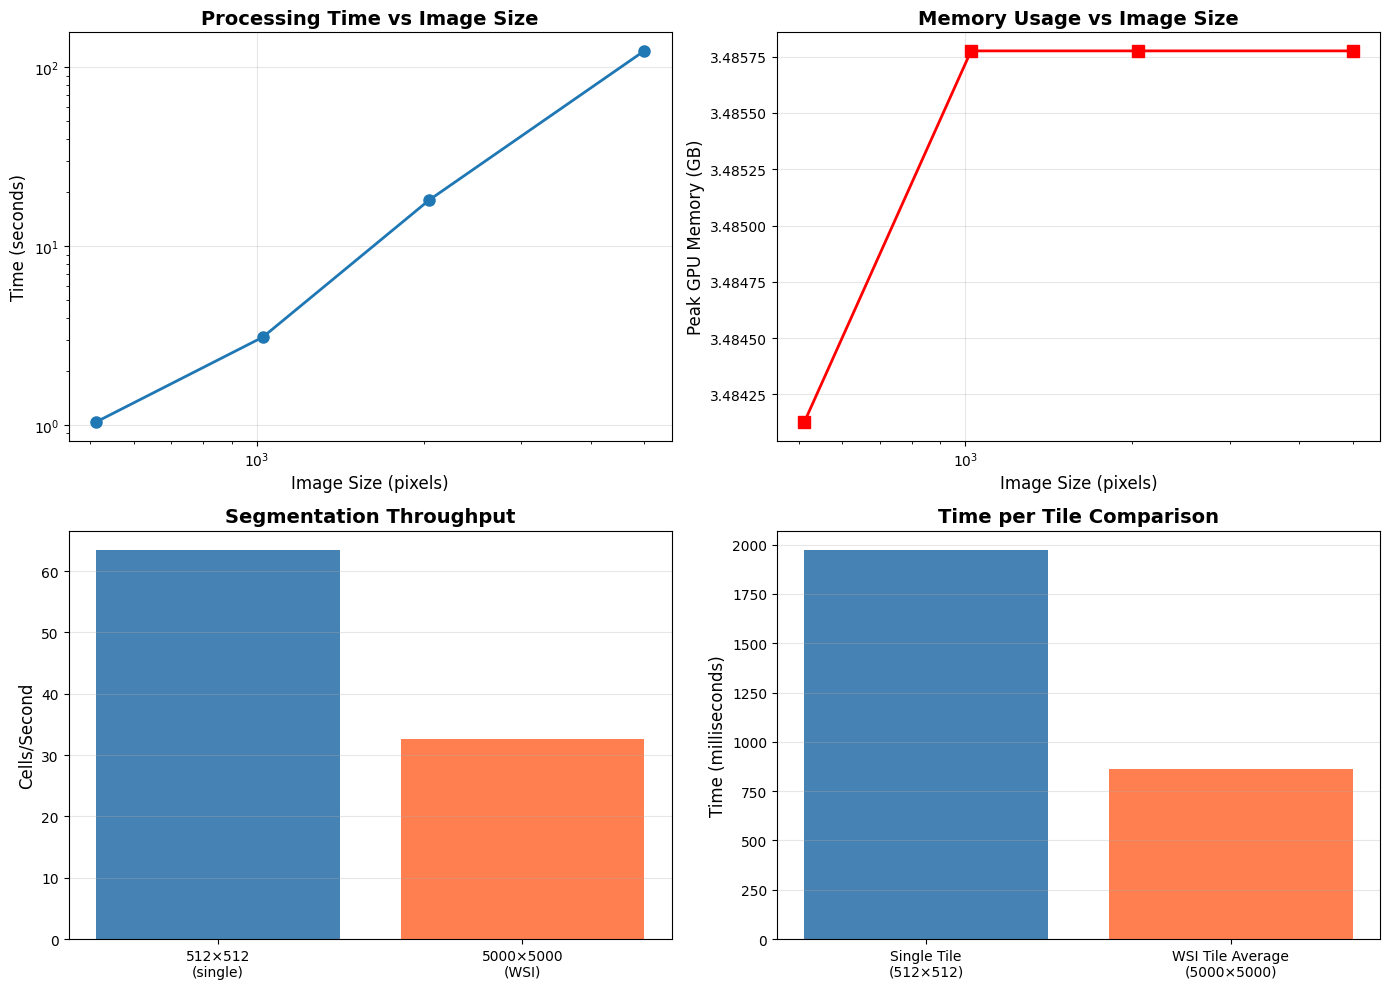


✓ Visualization saved to cellsam_benchmark_plots.png

BENCHMARK COMPLETE!

Key Metrics for Manuscript:
  • Time per 512×512 tile: 1971.3 ms
  • Peak memory (single tile): 3.48 GB
  • WSI processing time (5000×5000): 2.07 minutes
  • Throughput: 32.6 cells/second
  • Tiles per minute: 69.5


In [4]:
import numpy as np
import torch
import time
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from skimage.segmentation import find_boundaries
from cellSAM.wsi import segment_wsi
from cellSAM import segment_cellular_image
import psutil
import gc

# ============================================
# METRIC EXTRACTION FUNCTIONS
# ============================================

def compute_segmentation_metrics(mask):
    """Compute detailed segmentation statistics"""
    unique_labels = np.unique(mask)
    n_cells = len(unique_labels) - 1  # exclude background (0)
    
    # Cell size statistics
    cell_sizes = []
    for label in unique_labels[1:]:  # skip background
        cell_sizes.append(np.sum(mask == label))
    
    return {
        'n_cells': n_cells,
        'mean_cell_size': np.mean(cell_sizes) if cell_sizes else 0,
        'median_cell_size': np.median(cell_sizes) if cell_sizes else 0,
        'std_cell_size': np.std(cell_sizes) if cell_sizes else 0,
        'min_cell_size': np.min(cell_sizes) if cell_sizes else 0,
        'max_cell_size': np.max(cell_sizes) if cell_sizes else 0,
    }

def measure_gpu_memory():
    """Measure current GPU memory usage"""
    if torch.cuda.is_available():
        return {
            'allocated_gb': torch.cuda.memory_allocated() / 1024**3,
            'reserved_gb': torch.cuda.memory_reserved() / 1024**3,
            'max_allocated_gb': torch.cuda.max_memory_allocated() / 1024**3,
        }
    return {'allocated_gb': 0, 'reserved_gb': 0, 'max_allocated_gb': 0}

def measure_cpu_memory():
    """Measure current CPU memory usage"""
    process = psutil.Process()
    return process.memory_info().rss / 1024**3  # GB

# ============================================
# 1. SINGLE TILE BENCHMARK (512×512)
# ============================================

print("="*70)
print("CELLSAM BENCHMARK 1: SINGLE TILE (512×512)")
print("="*70)

# Load single tile
tile_512 = np.array(Image.open("test_images/ovarian-he_chunk_92.png"))
print(f"Tile shape: {tile_512.shape}")

# Reset memory stats
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
gc.collect()

# Warmup
print("Warmup runs...")
for _ in range(3):
    _ = segment_cellular_image(tile_512, model=model, device='cuda')

# Benchmark
n_runs = 10
times_512 = []
memory_512 = []

print(f"Running {n_runs} timed iterations...")
for i in range(n_runs):
    torch.cuda.reset_peak_memory_stats()
    torch.cuda.synchronize()
    
    start = time.time()
    mask_512, _, _ = segment_cellular_image(tile_512, model=model, device='cuda')
    torch.cuda.synchronize()
    end = time.time()
    
    times_512.append(end - start)
    memory_512.append(measure_gpu_memory()['max_allocated_gb'])
    print(f"  Run {i+1}/{n_runs}: {times_512[-1]:.3f}s, {memory_512[-1]:.2f} GB")

# Compute segmentation metrics
seg_metrics_512 = compute_segmentation_metrics(mask_512)

results_512 = {
    'image_size': '512×512',
    'n_cells': seg_metrics_512['n_cells'],
    'mean_time_s': np.mean(times_512),
    'std_time_s': np.std(times_512),
    'median_time_s': np.median(times_512),
    'min_time_s': np.min(times_512),
    'max_time_s': np.max(times_512),
    'mean_time_ms': np.mean(times_512) * 1000,
    'peak_memory_gb': np.mean(memory_512),
    'cells_per_second': seg_metrics_512['n_cells'] / np.mean(times_512),
    'mean_cell_size_px': seg_metrics_512['mean_cell_size'],
    'median_cell_size_px': seg_metrics_512['median_cell_size'],
}

print("\nRESULTS:")
for key, value in results_512.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

# ============================================
# 2. WHOLE SLIDE IMAGE BENCHMARK (5000×5000)
# ============================================

print("\n" + "="*70)
print("CELLSAM BENCHMARK 2: WHOLE SLIDE IMAGE (5000×5000)")
print("="*70)

# Load WSI
wsi_5000 = np.array(Image.open("test_images/region_5000x5000_standard.tif"))
print(f"WSI shape: {wsi_5000.shape}")

# Reset memory
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
gc.collect()

cpu_mem_before = measure_cpu_memory()
print(f"CPU memory before: {cpu_mem_before:.2f} GB")

# Run WSI segmentation
start_wsi = time.time()
mask_wsi = segment_wsi(
    wsi_5000,
    block_size=512,
    overlap=64,
    iou_depth=1,
    iou_threshold=0.5,
    model=model,
    device='cuda'
)

# Convert dask array if needed
if hasattr(mask_wsi, 'compute'):
    mask_wsi = mask_wsi.compute()

end_wsi = time.time()
elapsed_wsi = end_wsi - start_wsi

cpu_mem_after = measure_cpu_memory()
gpu_mem_wsi = measure_gpu_memory()

# Compute segmentation metrics
seg_metrics_wsi = compute_segmentation_metrics(mask_wsi)

# Calculate tile statistics
n_tiles_x = int(np.ceil(wsi_5000.shape[1] / (512 - 64)))
n_tiles_y = int(np.ceil(wsi_5000.shape[0] / (512 - 64)))
total_tiles = n_tiles_x * n_tiles_y

results_wsi = {
    'image_size': '5000×5000',
    'n_tiles': total_tiles,
    'tile_size': '512×512',
    'overlap': 64,
    'n_cells': seg_metrics_wsi['n_cells'],
    'total_time_s': elapsed_wsi,
    'total_time_min': elapsed_wsi / 60,
    'time_per_tile_s': elapsed_wsi / total_tiles,
    'time_per_tile_ms': (elapsed_wsi / total_tiles) * 1000,
    'peak_gpu_memory_gb': gpu_mem_wsi['max_allocated_gb'],
    'cpu_memory_delta_gb': cpu_mem_after - cpu_mem_before,
    'cells_per_second': seg_metrics_wsi['n_cells'] / elapsed_wsi,
    'tiles_per_minute': total_tiles / (elapsed_wsi / 60),
    'throughput_mpx_per_min': (5000 * 5000 / 1e6) / (elapsed_wsi / 60),
    'cell_density_per_mm2': seg_metrics_wsi['n_cells'] / ((5000 * 5000) / 1e6),
    'mean_cell_size_px': seg_metrics_wsi['mean_cell_size'],
}

print("\nRESULTS:")
for key, value in results_wsi.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

# ============================================
# 3. SCALING ANALYSIS: Different Image Sizes
# ============================================

print("\n" + "="*70)
print("CELLSAM BENCHMARK 3: SCALING ANALYSIS")
print("="*70)

# Test different crops of the WSI
test_sizes = [512, 1024, 2048, 5000]
scaling_results = []

for size in test_sizes:
    print(f"\nTesting {size}×{size} image...")
    
    # Extract crop from center of WSI
    if size <= 5000:
        center_y, center_x = wsi_5000.shape[0]//2, wsi_5000.shape[1]//2
        y1, y2 = center_y - size//2, center_y + size//2
        x1, x2 = center_x - size//2, center_x + size//2
        test_img = wsi_5000[y1:y2, x1:x2]
    else:
        test_img = wsi_5000
    
    # Reset memory
    torch.cuda.reset_peak_memory_stats()
    torch.cuda.synchronize()
    
    # Time the segmentation
    start = time.time()
    
    if size == 512:
        # Single tile - use regular function
        mask_test, _, _ = segment_cellular_image(test_img, model=model, device='cuda')
    else:
        # Larger - use WSI function
        mask_test = segment_wsi(
            test_img,
            block_size=512,
            overlap=64,
            iou_depth=1,
            iou_threshold=0.5,
            model=model,
            device='cuda'
        )
        if hasattr(mask_test, 'compute'):
            mask_test = mask_test.compute()
    
    torch.cuda.synchronize()
    elapsed = time.time() - start
    
    mem = measure_gpu_memory()
    seg_metrics = compute_segmentation_metrics(mask_test)
    
    scaling_results.append({
        'size': size,
        'n_pixels': size * size,
        'n_cells': seg_metrics['n_cells'],
        'time_s': elapsed,
        'time_ms': elapsed * 1000,
        'memory_gb': mem['max_allocated_gb'],
        'cells_per_sec': seg_metrics['n_cells'] / elapsed,
        'pixels_per_sec': (size * size) / elapsed,
    })
    
    print(f"  Time: {elapsed:.2f}s, Cells: {seg_metrics['n_cells']}, Memory: {mem['max_allocated_gb']:.2f} GB")

# ============================================
# 4. COMPILE ALL RESULTS
# ============================================

print("\n" + "="*70)
print("CELLSAM COMPREHENSIVE BENCHMARK SUMMARY")
print("="*70)

# Create summary dataframe
summary_df = pd.DataFrame([
    {
        'Test': 'Single Tile (512×512)',
        'Size': '512×512',
        'Cells': results_512['n_cells'],
        'Time (s)': results_512['mean_time_s'],
        'Time (ms)': results_512['mean_time_ms'],
        'Memory (GB)': results_512['peak_memory_gb'],
        'Cells/sec': results_512['cells_per_second'],
    },
    {
        'Test': 'WSI (5000×5000)',
        'Size': '5000×5000',
        'Cells': results_wsi['n_cells'],
        'Time (s)': results_wsi['total_time_s'],
        'Time (ms)': results_wsi['time_per_tile_ms'],
        'Memory (GB)': results_wsi['peak_gpu_memory_gb'],
        'Cells/sec': results_wsi['cells_per_second'],
    }
])

print("\n" + summary_df.to_string(index=False))

# Create scaling dataframe
scaling_df = pd.DataFrame(scaling_results)
print("\n" + "="*70)
print("SCALING ANALYSIS")
print("="*70)
print(scaling_df.to_string(index=False))

# ============================================
# 5. SAVE ALL RESULTS
# ============================================

# Save to CSV
summary_df.to_csv('cellsam_benchmark_summary.csv', index=False)
scaling_df.to_csv('cellsam_benchmark_scaling.csv', index=False)

# Save detailed results to JSON
import json

all_results = {
    'single_tile_512': results_512,
    'wsi_5000': results_wsi,
    'scaling': scaling_results,
    'hardware': {
        'gpu': torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'N/A',
        'gpu_memory_total_gb': torch.cuda.get_device_properties(0).total_memory / 1024**3 if torch.cuda.is_available() else 0,
    },
    'benchmark_date': time.strftime('%Y-%m-%d %H:%M:%S'),
}

with open('cellsam_benchmark_complete.json', 'w') as f:
    json.dump(all_results, f, indent=2)

print("\n✓ Results saved:")
print("  - cellsam_benchmark_summary.csv")
print("  - cellsam_benchmark_scaling.csv")
print("  - cellsam_benchmark_complete.json")

# ============================================
# 6. VISUALIZATION
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Scaling - Time vs Image Size
axes[0, 0].plot(scaling_df['size'], scaling_df['time_s'], 'o-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Image Size (pixels)', fontsize=12)
axes[0, 0].set_ylabel('Time (seconds)', fontsize=12)
axes[0, 0].set_title('Processing Time vs Image Size', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')

# Plot 2: Scaling - Memory vs Image Size
axes[0, 1].plot(scaling_df['size'], scaling_df['memory_gb'], 's-', color='red', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Image Size (pixels)', fontsize=12)
axes[0, 1].set_ylabel('Peak GPU Memory (GB)', fontsize=12)
axes[0, 1].set_title('Memory Usage vs Image Size', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xscale('log')

# Plot 3: Throughput
axes[1, 0].bar(['512×512\n(single)', '5000×5000\n(WSI)'], 
               [results_512['cells_per_second'], results_wsi['cells_per_second']],
               color=['steelblue', 'coral'])
axes[1, 0].set_ylabel('Cells/Second', fontsize=12)
axes[1, 0].set_title('Segmentation Throughput', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Time breakdown
labels = ['Single Tile\n(512×512)', 'WSI Tile Average\n(5000×5000)']
times_ms = [results_512['mean_time_ms'], results_wsi['time_per_tile_ms']]
axes[1, 1].bar(labels, times_ms, color=['steelblue', 'coral'])
axes[1, 1].set_ylabel('Time (milliseconds)', fontsize=12)
axes[1, 1].set_title('Time per Tile Comparison', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('cellsam_benchmark_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved to cellsam_benchmark_plots.png")

print("\n" + "="*70)
print("BENCHMARK COMPLETE!")
print("="*70)
print("\nKey Metrics for Manuscript:")
print(f"  • Time per 512×512 tile: {results_512['mean_time_ms']:.1f} ms")
print(f"  • Peak memory (single tile): {results_512['peak_memory_gb']:.2f} GB")
print(f"  • WSI processing time (5000×5000): {results_wsi['total_time_min']:.2f} minutes")
print(f"  • Throughput: {results_wsi['cells_per_second']:.1f} cells/second")
print(f"  • Tiles per minute: {results_wsi['tiles_per_minute']:.1f}")
print("="*70)